<a href="https://colab.research.google.com/github/HSYhrae/TIL/blob/master/python230816.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATA_PATH = '/content/drive/MyDrive/멀티캠퍼스 국비지원 교육/정지훈 강사님 수업/머신러닝&딥러닝/data/bike-sharing-demand/'
train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')
submission = pd.read_csv(DATA_PATH + 'sampleSubmission.csv')

In [ ]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [ ]:
test.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027


In [ ]:
submission.head(1)

,datetime,count
0,2011-01-20 00:00:00,0


## 탐색적 자료 분석
- datetime: 1시간 간격 데이터 수집
- season
    + 1: 봄, 2: 여름. 3: 가을. 4: 겨울
- holiday
    + 0: 공휴일 아님, 1: 공휴일
- workingday
    + 0: 평일 아님, 1: 평일
- weather:
    + 1: 맑음, 2: 약간 흐림, 3: 약한 눈, 비, 4: 폭우, 폭설(기상이 매우 안 좋은 상태)


- 종속변수: count(자전거 대여 수량)

## 문제 정의
- 각 시간대별로 자전거 대여 수량을 예측하세요!



## 데이터 확인
- casual, registered가 train데이터에 존재, test데이터에는 현재 없는 상황
    + casual: 비회원수
    + registered: 회원수
    + count: casual + registered

## 날짜 데이터를 변환

In [ ]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [ ]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])

train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00


In [ ]:
 text = '2011-01-01 00:00:00'
 print(text.split()[0].split('-'))
 print(text.split()[1].split())

['2011', '01', '01']
['00:00:00']


- 요일 반환

In [ ]:
from datetime import datetime
import calendar
sample_dt = train['date'][300] # 날짜
print(datetime.strptime(sample_dt, '%Y-%m-%d')) # datetime 타입으로 변경
print(datetime.strptime(sample_dt, '%Y-%m-%d').weekday()) # 정수로 요일 반환
print(calendar.day_name[3]) # Thursday 변환

2011-01-13 00:00:00
3
Thursday


In [ ]:
train['weekday'] = train['date'].apply(lambda x: calendar.day_name[datetime.strptime(x, '%Y-%m-%d').weekday()])
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday


In [ ]:
# season
train['season'] = train['season'].map({1: '봄', 2: '여름', 3: '가을', 4: '겨울'})
# weather
train['weather'] = train['weather'].map({1: '맑음', 2: '약간 흐림', 3: '약한강우', 4: '강한강우'})
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,봄,0,0,맑음,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,봄,0,0,맑음,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday


## 시각화 코드 작성
- count = 기울기x1 + x2 + x3
- 종속변수(반응변수)가 제일 중요한 변수
- 시각화를 그린다.
- count는 고정적으로 들어가야 한다.
    + count 수치데이터를 기반으로 한 시각화의 종류를 파악해야 한다.
    + 히스토그램: count
    + 산점도: y = count, x = 수치형 변수
    + 히트맵: 수치형 vs 수치형
    + 막대그래프, 박스플롯, 선 그래프: x = 범주 - 날짜 , y = count

## 탐색적 데이터 분석
- 머신러닝을 진행할 때 왜 하냐?
- 머신러닝
    + 예측을 하기 위한 방법론
- 최신 알고리즘이 있으니까, 그거 쓰면 다 되는 거 아니에요?
- 시각화를 작성해서 얻고자 하는 목적!
- 목적: 쓸만한 변수를 찾는다. 그후 행처리 작업을 진행한다. (필요없는 행 제거)

탐색적 데이터 분석 <==> Feature Engineering (피처 엔지니어링)

Feature Engineering (피처 엔지니어링) ==> 머신러닝 알고리즘에 적용할 독립변수를 찾아서 넣어주는 것


==> 미래 예측을 한다고 할 때, 필요한 독립변수는 최소 몇개가 필요할끼? 1개

- y = x1 + x2 + x3 + x4 ~~~
- y = ax + b
-  y = ax + bx + c (변수는 컬럼이다)

- 아기의 성별을 예측하는데 필요한 변수로는 몸무게, 키 등은 key column은 아니다. 성기가 key column이다.

### 내가 사용하고자 하는 독립변수 x 컬럼이 정말로 y 변수에 중요한 영량을 끼치는 변수일까?

### 여러 컬럼들이 중복이 될 수도 있고, 아니면 중요하지 않은 컬럼이 있을 수 도 있고

### 그러한 컬럼들을 찾고, 적절하게 전처리를 하는 것(종속변수에 영향을 주냐 안주냐!!!)

- 16 = a * season + b * holiday + c * working + ... +
- 32 = 4 * 8
- 16 = 4 * 4

- winspeed 5 기상예보, 그 다음날 대여량은 20


- 그러면 각 독립변수의 기울기를 찾는 것이 머신러닝이고, 그 독립변수를 추리는 게 탐색적 데이터 분석인가요?

- 정형데이터 컬럼이 존재하고, 그걸 추리는 건 ==> 사람 ==> 머신러닝
- 비정형데이터 이미지, 영상 그걸 추리는 건 ==> 알고리즘 ==> 딥러닝

25년 정도 되신 분석가님 ==> SAS 이걸 활용하신 분 --> 질문 2개: 머신러닝 Input 변수를 어떤식으로 선정하셨나요?

--> 머신러닝 Input 변수를 몇개 사용하셨나요?

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

## 종속변수 로그 변환

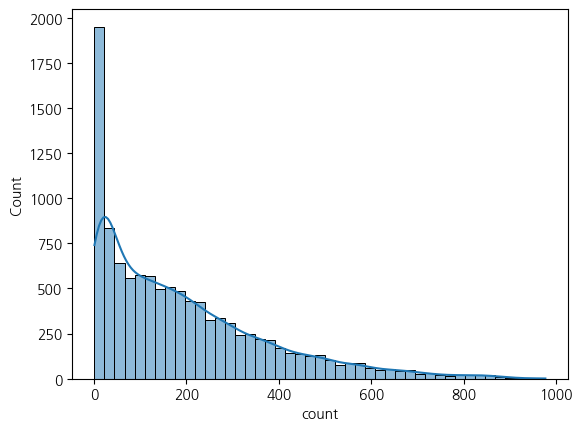

In [ ]:
fig, ax = plt.subplots()
sns.histplot(train['count'], kde = True)
plt.show()

<Axes: xlabel='count', ylabel='Count'>

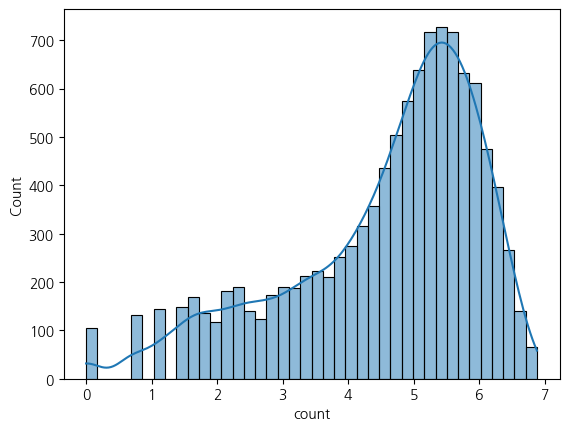

In [ ]:
sns.histplot(np.log(train['count']), kde = True)

- 첫번째 작업 완료
    + 종속변수는 로그변환을 취해서 학습을 진행하기로 한다.
    + 로그변환을 하고 예측을 하면, 로그변환된 값을 예측
    + 로그변환된 값을 지수변환으로 변경해서 최종예측

## 막대 그래프

In [ ]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday


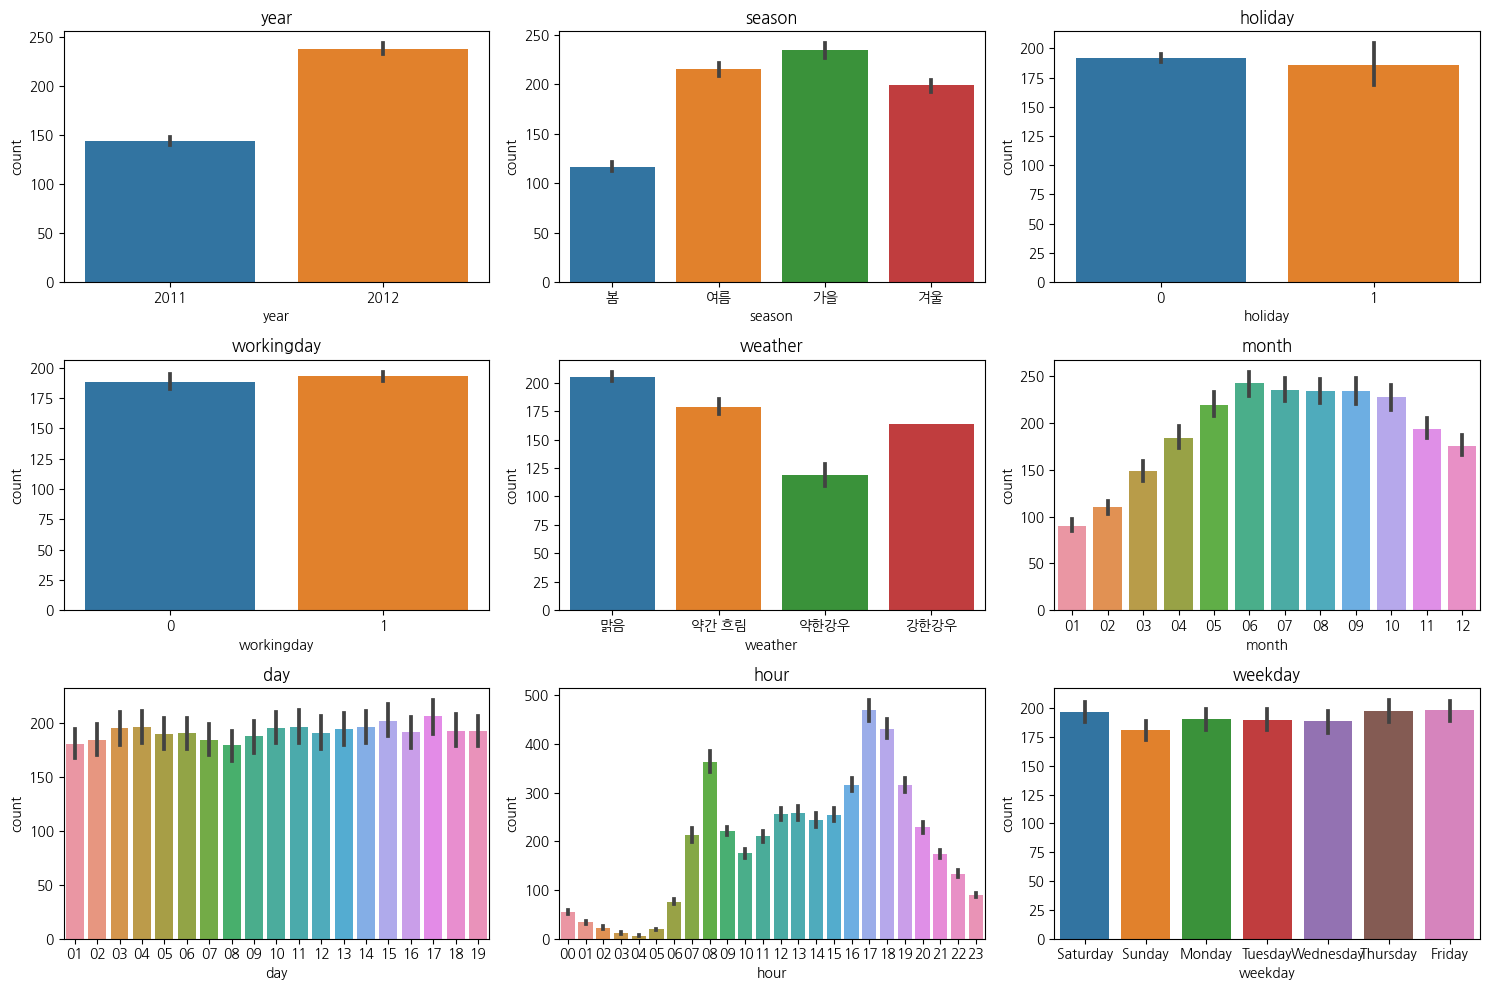

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
sns.barplot(x = 'year', y = 'count', data = train, ax = ax[0,0])
sns.barplot(x = 'season', y = 'count', data = train, ax = ax[0,1])
sns.barplot(x = 'holiday', y = 'count', data = train, ax = ax[0,2])
sns.barplot(x = 'workingday', y = 'count', data = train, ax = ax[1,0])
sns.barplot(x = 'weather', y = 'count', data = train, ax = ax[1,1])
sns.barplot(x = 'month', y = 'count', data = train, ax = ax[1,2])
sns.barplot(x = 'day', y = 'count', data = train, ax = ax[2,0])
sns.barplot(x = 'hour', y = 'count', data = train, ax = ax[2,1])
sns.barplot(x = 'weekday', y = 'count', data = train, ax = ax[2,2])
ax[0, 0].set_title('year')
ax[0, 1].set_title('season')
ax[0, 2].set_title('holiday')
ax[1, 0].set_title('workingday')
ax[1, 1].set_title('weather')
ax[1, 2].set_title('month')
ax[2, 0].set_title('day')
ax[2, 1].set_title('hour')
ax[2, 2].set_title('weekday')
plt.tight_layout() # 그래프 제목과 x축 제묵이 겹치지 않게 해줌
plt.show()

In [ ]:
test['date'] = test['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성
test['year'] = test['datetime'].apply(lambda x: x.split()[0].split('-')[0])
test['month'] = test['datetime'].apply(lambda x: x.split()[0].split('-')[1])
test['day'] = test['datetime'].apply(lambda x: x.split()[0].split('-')[2])
test['hour'] = test['datetime'].apply(lambda x: x.split()[1].split(':')[0])
test['minute'] = test['datetime'].apply(lambda x: x.split()[1].split(':')[1])
test['second'] = test['datetime'].apply(lambda x: x.split()[1].split(':')[2])
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,2011,01,20,00,00,00
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,01,00,00
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,02,00,00


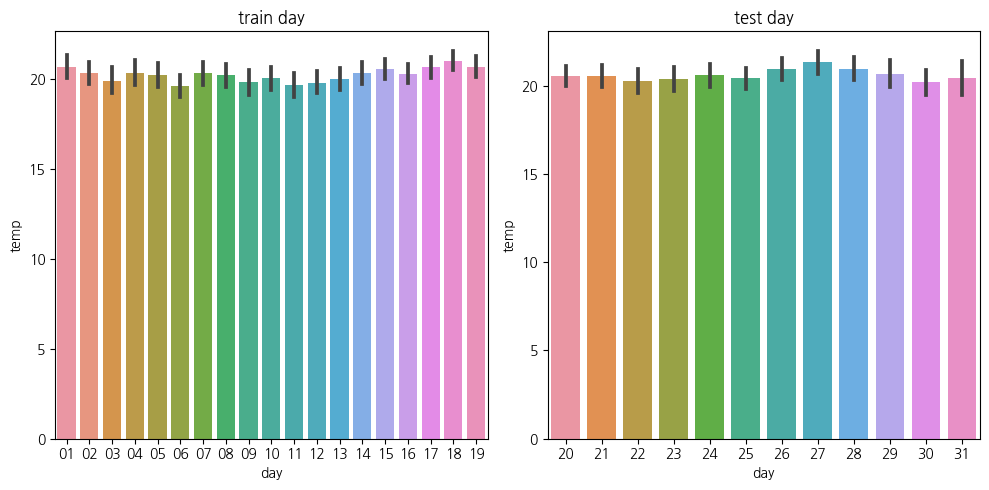

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
sns.barplot(x = 'day', y = 'temp', data = train, ax = ax[0])
sns.barplot(x = 'day', y = 'temp', data = test, ax = ax[1])
ax[0].set_title('train day')
ax[1].set_title('test day')
plt.tight_layout()
plt.show()

## day컬럼은 제거!
- 막대 그래프에서 굳이 필요없는 피처를 찾자면!!
- day 컬럼은 제외!! 이유 train 1~19, test 20~31
    + 참조할만한 날짜가 훈련데이터에 존재하지 않음
- 예측은 변동성

## second, minute 컬럼은 제거
- 아무런 정보가 없음

## boxplot
- weather, season, weekday, holiday
- 2 x 2 배열이 나오도록





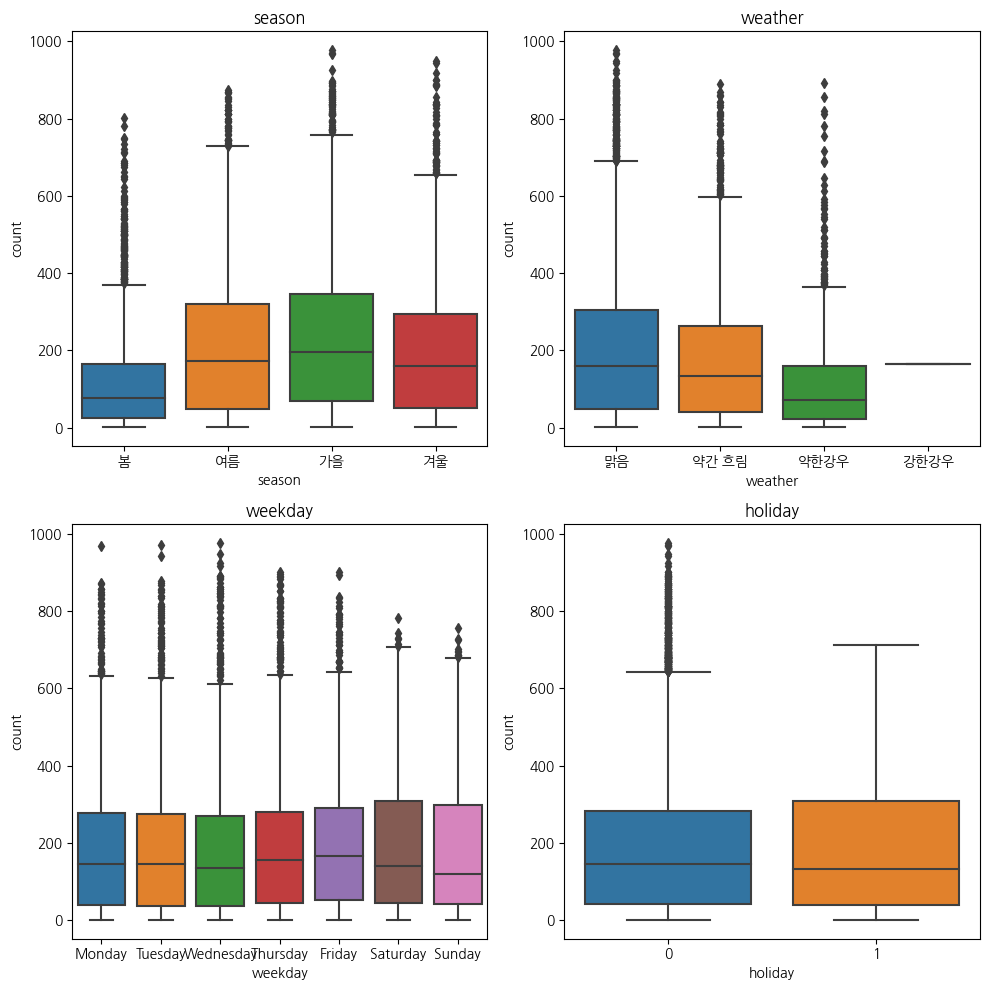

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data = train, x = 'season', y = 'count', ax = ax[0,0])
sns.boxplot(data = train, x = 'weather', y = 'count', ax = ax[0,1])
sns.boxplot(data = train, x = 'weekday', y = 'count', ax = ax[1,0], order = weekday)
sns.boxplot(data = train, x = 'holiday', y = 'count', ax = ax[1,1])
ax[0,0].set_title('season')
ax[0,1].set_title('weather')
ax[1,0].set_title('weekday')
ax[1,1].set_title('holiday')
plt.tight_layout()
plt.show()

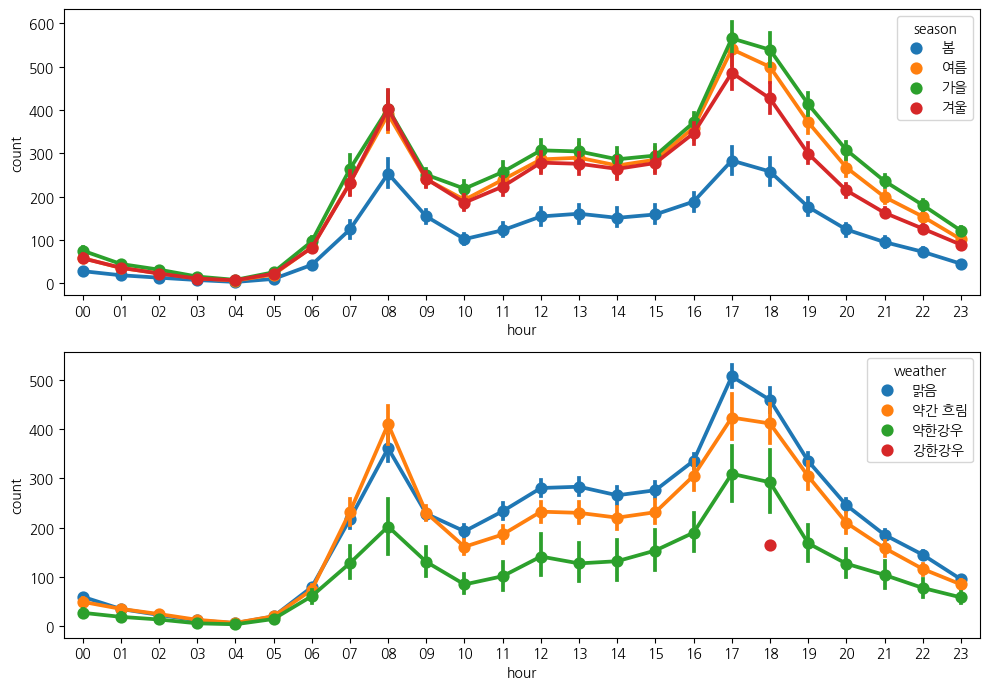

맑음       7192
약간 흐림    2834
약한강우      859
강한강우        1
Name: weather, dtype: int64

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize=(10,7))
# 계절, 날씨
sns.pointplot(x = 'hour', y = 'count', hue = 'season', data = train, ax = ax[0])
sns.pointplot(x = 'hour', y = 'count', hue = 'weather', data = train, ax = ax[1])
plt.tight_layout()
plt.show()

In [ ]:
train['weather'].value_counts()

맑음       7192
약간 흐림    2834
약한강우      859
강한강우        1
Name: weather, dtype: int64

## 강한강우가 포함된 행은 제거 Task


### 강한 강우
- 데이터 분석 관점에서는 단순 제거하는 게 맞을 수도 있지만, 실무에서는 왜 이상이 발생했는지 파악해야함
- 첫번째: 시스템 이상? ==> PM에게 보고 ==> 개발자 수정
- 데이터 시각화로 저 이상치를 잡아냄

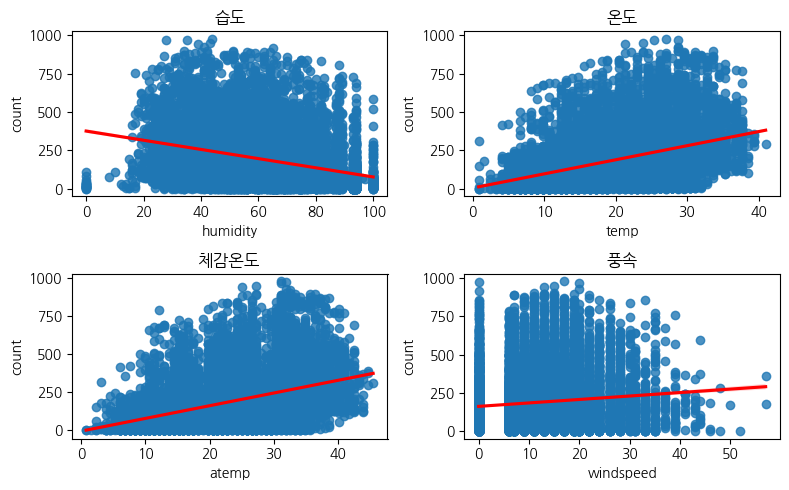

In [ ]:
# 회귀식 산점도
# regplot () 사용
fig, ax = plt.subplots(2, 2, figsize = (8, 5))
sns.regplot(x = train['humidity'], y = train['count'],  line_kws={'color': 'red'},  ax = ax[0, 0])
sns.regplot(x = train['temp'], y = train['count'], line_kws={'color': 'red'}, ax = ax[0, 1])
sns.regplot(x = train['atemp'], y = train['count'], line_kws={'color': 'red'}, ax = ax[1, 0])
sns.regplot(x = train['windspeed'], y = train['count'], line_kws={'color': 'red'}, ax = ax[1, 1]) # weather를 사용해서 3가지 그래프를 그릴 수 있다.
ax[0, 0].set_title('습도')
ax[0, 1].set_title('온도')
ax[1, 0].set_title('체감온도')
ax[1, 1].set_title('풍속')
plt.tight_layout()
plt.show()

- 추후에 같은 기울기를 가진 3가지 컬럼을 가지고 상관분석을 돌리게 됨 셋중에서 가장 주목할 만한 컬럼은 `온도`이다.
- 이때 `습도`는 반대의 기울기를 가져 중요한 컬럼이다.
- temp, humidity 컬럼만 쓰겠다.

## 최종적인 input 변수 선정
- 오늘 수업의 중점: 탐색적 데이터 분석을 왜 해야 하지?

In [ ]:
cols = ['', '', '']

final_df = train.loc[train['weather'] == '강한강우', cols]

# 탐색적 데이터 분석이 끝난 데이터가 됨


KeyError: ignored

### 모델링
- 만약 모델링을 진행했는데 평가지표가 0.7이 나오면
- 평가지표가 0.9가 되도록 해야한다.

<ipython-input-32-ddb4ac277332>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,square=True)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


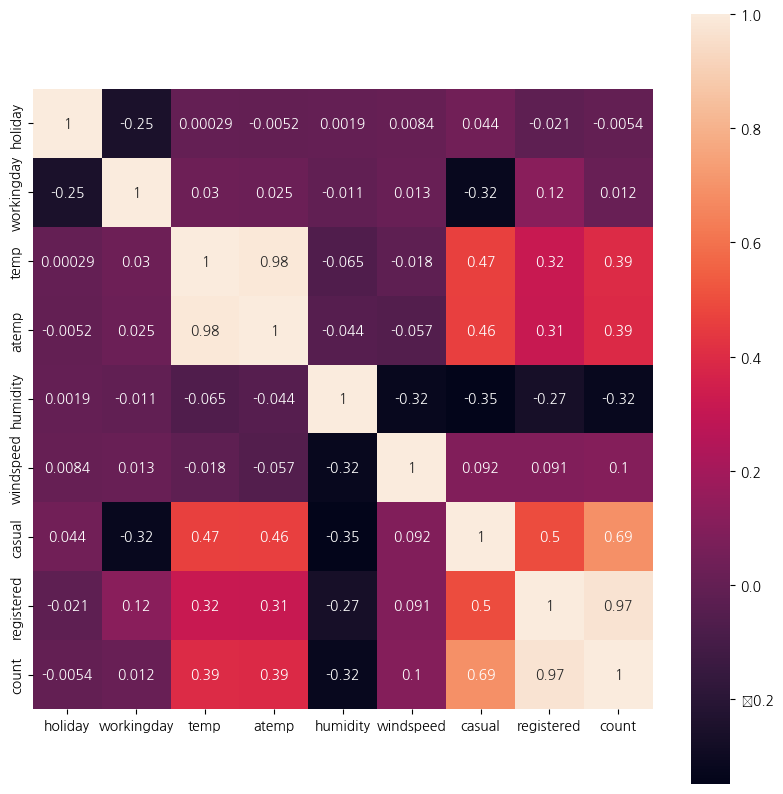

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(train.corr(),annot=True,square=True)

plt.show()